In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import warnings
%matplotlib inline 
warnings.filterwarnings ('ignore')

In [2]:
import scipy
import scipy.stats as st
import plotly.express as px
import streamlit as st

In [3]:
from sklearn.pipeline import Pipeline

In [4]:
raw_data = pd.read_csv('C:\\Users\\Ghazaal\\Desktop\\New folder (10)\\House Prediction11.csv')
data = raw_data.copy()
data.head()

,Area,Age,Room,Warehouse,Parking,Elevator,Address,Price,USD,PriceUSD
0,153,1393,3,True,True,True,امروز در تهران، درکه,18360000000,49135,373664.394
1,57,1385,2,False,False,True,امروز در تهران، جابری,2600000000,49135,52915.43706
2,193,1371,3,False,False,True,امروز در تهران، فرمانیه,23000000000,49135,468098.0971
3,62,1401,1,True,True,True,امروز در تهران، دهکده المپیک، بزرگراه همت (کنا...,1410000000,49135,28696.44856
4,115,1400,2,True,True,True,امروز در تهران، حکیمیه,9200000000,49135,187239.2388


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93117 entries, 0 to 93116
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Area       93117 non-null  int64 
 1   Age        93117 non-null  int64 
 2   Room       93117 non-null  int64 
 3   Warehouse  93117 non-null  bool  
 4   Parking    93117 non-null  bool  
 5   Elevator   93117 non-null  bool  
 6   Address    93117 non-null  object
 7   Price      93117 non-null  object
 8   USD        93117 non-null  int64 
 9   PriceUSD   93117 non-null  object
dtypes: bool(3), int64(4), object(3)
memory usage: 5.2+ MB


In [6]:
data

,Area,Age,Room,Warehouse,Parking,Elevator,Address,Price,USD,PriceUSD
0,153,1393,3,True,True,True,امروز در تهران، درکه,18360000000,49135,373664.394
1,57,1385,2,False,False,True,امروز در تهران، جابری,2600000000,49135,52915.43706
2,193,1371,3,False,False,True,امروز در تهران، فرمانیه,23000000000,49135,468098.0971
3,62,1401,1,True,True,True,امروز در تهران، دهکده المپیک، بزرگراه همت (کنا...,1410000000,49135,28696.44856
4,115,1400,2,True,True,True,امروز در تهران، حکیمیه,9200000000,49135,187239.2388
...,...,...,...,...,...,...,...,...,...,...
93112,181,1393,3,True,True,True,دو هفته پیش در تهران، جردن,18000000000,42005,428520.4142
93113,121,1400,3,True,True,True,دو هفته پیش در تهران، اباذر,13800000000,42005,328532.3176
93114,140,1400,3,True,True,True,دو هفته پیش در تهران، آبشار تهران,9860000000,42005,234733.9602
93115,105,1398,2,True,True,True,دو هفته پیش در تهران، اوقاف,6430000000,42005,153077.0146


In [7]:
#CLEANING

In [8]:
data.drop(data.loc[data['Price']=="توافقی"].index, inplace=True)

In [9]:
data

,Area,Age,Room,Warehouse,Parking,Elevator,Address,Price,USD,PriceUSD
0,153,1393,3,True,True,True,امروز در تهران، درکه,18360000000,49135,373664.394
1,57,1385,2,False,False,True,امروز در تهران، جابری,2600000000,49135,52915.43706
2,193,1371,3,False,False,True,امروز در تهران، فرمانیه,23000000000,49135,468098.0971
3,62,1401,1,True,True,True,امروز در تهران، دهکده المپیک، بزرگراه همت (کنا...,1410000000,49135,28696.44856
4,115,1400,2,True,True,True,امروز در تهران، حکیمیه,9200000000,49135,187239.2388
...,...,...,...,...,...,...,...,...,...,...
93112,181,1393,3,True,True,True,دو هفته پیش در تهران، جردن,18000000000,42005,428520.4142
93113,121,1400,3,True,True,True,دو هفته پیش در تهران، اباذر,13800000000,42005,328532.3176
93114,140,1400,3,True,True,True,دو هفته پیش در تهران، آبشار تهران,9860000000,42005,234733.9602
93115,105,1398,2,True,True,True,دو هفته پیش در تهران، اوقاف,6430000000,42005,153077.0146


In [10]:
def f(Address):
    if '،' in Address:
        return Address.split('،')[1].split('|')[0].strip()
    else:
        return 'Unknown'

In [11]:
data['Address'] = data['Address'].apply(f)

In [12]:
data

,Area,Age,Room,Warehouse,Parking,Elevator,Address,Price,USD,PriceUSD
0,153,1393,3,True,True,True,درکه,18360000000,49135,373664.394
1,57,1385,2,False,False,True,جابری,2600000000,49135,52915.43706
2,193,1371,3,False,False,True,فرمانیه,23000000000,49135,468098.0971
3,62,1401,1,True,True,True,دهکده المپیک,1410000000,49135,28696.44856
4,115,1400,2,True,True,True,حکیمیه,9200000000,49135,187239.2388
...,...,...,...,...,...,...,...,...,...,...
93112,181,1393,3,True,True,True,جردن,18000000000,42005,428520.4142
93113,121,1400,3,True,True,True,اباذر,13800000000,42005,328532.3176
93114,140,1400,3,True,True,True,آبشار تهران,9860000000,42005,234733.9602
93115,105,1398,2,True,True,True,اوقاف,6430000000,42005,153077.0146


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92872 entries, 0 to 93116
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Area       92872 non-null  int64 
 1   Age        92872 non-null  int64 
 2   Room       92872 non-null  int64 
 3   Warehouse  92872 non-null  bool  
 4   Parking    92872 non-null  bool  
 5   Elevator   92872 non-null  bool  
 6   Address    92872 non-null  object
 7   Price      92872 non-null  object
 8   USD        92872 non-null  int64 
 9   PriceUSD   92872 non-null  object
dtypes: bool(3), int64(4), object(3)
memory usage: 5.9+ MB


In [14]:
data['PriceUSD'] = data['PriceUSD'].astype(float)

In [15]:
data['PriceUSD'] = data['PriceUSD'].astype(int)

In [16]:
data['Price'] = data['Price'].astype(float)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92872 entries, 0 to 93116
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       92872 non-null  int64  
 1   Age        92872 non-null  int64  
 2   Room       92872 non-null  int64  
 3   Warehouse  92872 non-null  bool   
 4   Parking    92872 non-null  bool   
 5   Elevator   92872 non-null  bool   
 6   Address    92872 non-null  object 
 7   Price      92872 non-null  float64
 8   USD        92872 non-null  int64  
 9   PriceUSD   92872 non-null  int32  
dtypes: bool(3), float64(1), int32(1), int64(4), object(1)
memory usage: 5.6+ MB


In [18]:
decimals = 2
data['PriceUSD'] = data['PriceUSD'].apply(lambda x: round(x, decimals))

In [19]:
data

,Area,Age,Room,Warehouse,Parking,Elevator,Address,Price,USD,PriceUSD
0,153,1393,3,True,True,True,درکه,1.836000e+10,49135,373664
1,57,1385,2,False,False,True,جابری,2.600000e+09,49135,52915
2,193,1371,3,False,False,True,فرمانیه,2.300000e+10,49135,468098
3,62,1401,1,True,True,True,دهکده المپیک,1.410000e+09,49135,28696
4,115,1400,2,True,True,True,حکیمیه,9.200000e+09,49135,187239
...,...,...,...,...,...,...,...,...,...,...
93112,181,1393,3,True,True,True,جردن,1.800000e+10,42005,428520
93113,121,1400,3,True,True,True,اباذر,1.380000e+10,42005,328532
93114,140,1400,3,True,True,True,آبشار تهران,9.860000e+09,42005,234733
93115,105,1398,2,True,True,True,اوقاف,6.430000e+09,42005,153077


In [20]:
data['Parking'] = data['Parking'].astype('int')
data['Warehouse'] = data['Warehouse'].astype('int')
data['Elevator'] = data['Elevator'].astype('int')

In [21]:
data

,Area,Age,Room,Warehouse,Parking,Elevator,Address,Price,USD,PriceUSD
0,153,1393,3,1,1,1,درکه,1.836000e+10,49135,373664
1,57,1385,2,0,0,1,جابری,2.600000e+09,49135,52915
2,193,1371,3,0,0,1,فرمانیه,2.300000e+10,49135,468098
3,62,1401,1,1,1,1,دهکده المپیک,1.410000e+09,49135,28696
4,115,1400,2,1,1,1,حکیمیه,9.200000e+09,49135,187239
...,...,...,...,...,...,...,...,...,...,...
93112,181,1393,3,1,1,1,جردن,1.800000e+10,42005,428520
93113,121,1400,3,1,1,1,اباذر,1.380000e+10,42005,328532
93114,140,1400,3,1,1,1,آبشار تهران,9.860000e+09,42005,234733
93115,105,1398,2,1,1,1,اوقاف,6.430000e+09,42005,153077


In [22]:
data['Permeter'] = data['PriceUSD'] / data['Area']

In [23]:
data['Permeter'] = data['Permeter']

In [24]:
data

,Area,Age,Room,Warehouse,Parking,Elevator,Address,Price,USD,PriceUSD,Permeter
0,153,1393,3,1,1,1,درکه,1.836000e+10,49135,373664,2442.248366
1,57,1385,2,0,0,1,جابری,2.600000e+09,49135,52915,928.333333
2,193,1371,3,0,0,1,فرمانیه,2.300000e+10,49135,468098,2425.378238
3,62,1401,1,1,1,1,دهکده المپیک,1.410000e+09,49135,28696,462.838710
4,115,1400,2,1,1,1,حکیمیه,9.200000e+09,49135,187239,1628.165217
...,...,...,...,...,...,...,...,...,...,...,...
93112,181,1393,3,1,1,1,جردن,1.800000e+10,42005,428520,2367.513812
93113,121,1400,3,1,1,1,اباذر,1.380000e+10,42005,328532,2715.140496
93114,140,1400,3,1,1,1,آبشار تهران,9.860000e+09,42005,234733,1676.664286
93115,105,1398,2,1,1,1,اوقاف,6.430000e+09,42005,153077,1457.876190


In [25]:
decimals = 2   
data['Permeter'] = data['Permeter'].apply(lambda x: round(x, decimals))

In [26]:
data

,Area,Age,Room,Warehouse,Parking,Elevator,Address,Price,USD,PriceUSD,Permeter
0,153,1393,3,1,1,1,درکه,1.836000e+10,49135,373664,2442.25
1,57,1385,2,0,0,1,جابری,2.600000e+09,49135,52915,928.33
2,193,1371,3,0,0,1,فرمانیه,2.300000e+10,49135,468098,2425.38
3,62,1401,1,1,1,1,دهکده المپیک,1.410000e+09,49135,28696,462.84
4,115,1400,2,1,1,1,حکیمیه,9.200000e+09,49135,187239,1628.17
...,...,...,...,...,...,...,...,...,...,...,...
93112,181,1393,3,1,1,1,جردن,1.800000e+10,42005,428520,2367.51
93113,121,1400,3,1,1,1,اباذر,1.380000e+10,42005,328532,2715.14
93114,140,1400,3,1,1,1,آبشار تهران,9.860000e+09,42005,234733,1676.66
93115,105,1398,2,1,1,1,اوقاف,6.430000e+09,42005,153077,1457.88


In [27]:
data.isna().sum()

Area         0
Age          0
Room         0
Warehouse    0
Parking      0
Elevator     0
Address      0
Price        0
USD          0
PriceUSD     0
Permeter     0
dtype: int64

In [28]:
data['Address'].value_counts()

پونک                      4589
سعادت‌آباد                3513
دریاچه شهدای خلیج فارس    2873
کوی فردوس                 2570
چیتگر                     2366
                          ... 
شهرک آسمان                   2
شهرک فرهنگیان                2
شهرک غزالی                   1
فتح                          1
شهرک شریفی                   1
Name: Address, Length: 337, dtype: int64

In [29]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
           categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'other'
    return categorical_map

In [30]:
Address_map = shorten_categories(data.Address.value_counts(), 400)
data['Address'] = data['Address'].map(Address_map)
data.Address.value_counts()

other                     22201
پونک                       4589
سعادت‌آباد                 3513
دریاچه شهدای خلیج فارس     2873
کوی فردوس                  2570
چیتگر                      2366
جیحون                      2242
پاسداران                   2115
جنت‌آباد جنوبی             1849
جنت‌آباد مرکزی             1827
نیاوران                    1816
سازمان برنامه              1739
قیطریه                     1708
هروی                       1628
مرزداران                   1626
زعفرانیه                   1564
فرمانیه                    1491
سلسبیل                     1459
اندیشه (شهر زیبا)          1324
تهرانپارس غربی             1313
باغ فیض                    1293
دروس                       1250
ولنجک                      1219
میرداماد                   1211
سهروردی                    1184
الهیه                      1167
استاد معین                 1148
ستارخان                    1143
شهر زیبا                   1043
جردن                       1005
شهرک غرب                    970
تهران‌سر

In [31]:
other = 'other'

In [32]:
data = data[data['Address'] != other]
print("\nDataFrame after dropping '{}' group:".format(other))


DataFrame after dropping 'other' group:


In [33]:
data

,Area,Age,Room,Warehouse,Parking,Elevator,Address,Price,USD,PriceUSD,Permeter
2,193,1371,3,0,0,1,فرمانیه,2.300000e+10,49135,468098,2425.38
3,62,1401,1,1,1,1,دهکده المپیک,1.410000e+09,49135,28696,462.84
5,138,1401,3,1,1,1,شهرک غرب,2.050000e+10,49135,417217,3023.31
6,295,1401,4,1,1,1,سعادت‌آباد,6.000000e+10,49135,1221125,4139.41
7,155,1395,3,1,1,1,سعادت‌آباد,2.550000e+10,49135,518978,3348.25
...,...,...,...,...,...,...,...,...,...,...,...
93109,147,1385,3,1,1,1,سعادت‌آباد,1.830000e+10,42005,435662,2963.69
93110,62,1395,1,1,1,1,اندیشه (شهر زیبا),2.200000e+09,42005,52374,844.74
93112,181,1393,3,1,1,1,جردن,1.800000e+10,42005,428520,2367.51
93113,121,1400,3,1,1,1,اباذر,1.380000e+10,42005,328532,2715.14


In [34]:
data.Address.value_counts()

پونک                      4589
سعادت‌آباد                3513
دریاچه شهدای خلیج فارس    2873
کوی فردوس                 2570
چیتگر                     2366
جیحون                     2242
پاسداران                  2115
جنت‌آباد جنوبی            1849
جنت‌آباد مرکزی            1827
نیاوران                   1816
سازمان برنامه             1739
قیطریه                    1708
هروی                      1628
مرزداران                  1626
زعفرانیه                  1564
فرمانیه                   1491
سلسبیل                    1459
اندیشه (شهر زیبا)         1324
تهرانپارس غربی            1313
باغ فیض                   1293
دروس                      1250
ولنجک                     1219
میرداماد                  1211
سهروردی                   1184
الهیه                     1167
استاد معین                1148
ستارخان                   1143
شهر زیبا                  1043
جردن                      1005
شهرک غرب                   970
تهران‌سر                   938
گیشا (کوی نصر)             930
شهرک راه

In [35]:
grouped_data = data.groupby(['Address'], dropna = False).mean().sort_values(['PriceUSD'])
grouped_data

,Area,Age,Room,Warehouse,Parking,Elevator,Price,USD,PriceUSD,Permeter
Address,,,,,,,,,,
مبارک‌آباد بهشتی,86.732584,1399.267416,1.894382,0.950562,0.705618,0.955056,2.231894e+09,48700.934831,45999.689888,534.251888
اندیشه (شهر زیبا),65.769637,1394.524169,1.605740,0.504532,0.971299,0.996979,2.397091e+09,46422.772659,51901.778701,778.040076
نواب,65.310722,1388.857768,1.501094,0.551422,0.518600,0.879650,2.894268e+09,46011.597374,63230.417943,971.409934
بریانک,62.931507,1388.175799,1.503425,0.407534,0.538813,0.910959,3.015988e+09,45762.050228,66020.821918,1062.253516
جی,67.305331,1390.596123,1.463651,0.615509,0.588045,0.903069,3.137764e+09,45755.757674,68865.707593,1048.949225
سلسبیل,60.686772,1386.409870,1.463331,0.334476,0.427690,0.898561,3.367864e+09,45893.777930,73689.265250,1220.802303
جیحون,63.037913,1390.005352,1.429527,0.504460,0.460749,0.898305,3.501386e+09,46045.375112,76243.221677,1223.006945
آذربایجان,64.471154,1387.038462,1.503606,0.346154,0.463942,0.890625,3.842049e+09,46079.718750,83789.879808,1297.971995
وردآورد,106.561151,1399.263789,2.139089,0.961631,0.961631,0.968825,4.059955e+09,45912.541966,89008.182254,838.065444


In [36]:
from sklearn.preprocessing import OrdinalEncoder

In [37]:
data1 = data.copy()

In [38]:
enc = OrdinalEncoder(categories=[grouped_data.index.to_list()])
data1['Address'] = enc.fit_transform(data1[['Address']])

In [39]:
data1

,Area,Age,Room,Warehouse,Parking,Elevator,Address,Price,USD,PriceUSD,Permeter
2,193,1371,3,0,0,1,53.0,2.300000e+10,49135,468098,2425.38
3,62,1401,1,1,1,1,14.0,1.410000e+09,49135,28696,462.84
5,138,1401,3,1,1,1,47.0,2.050000e+10,49135,417217,3023.31
6,295,1401,4,1,1,1,49.0,6.000000e+10,49135,1221125,4139.41
7,155,1395,3,1,1,1,49.0,2.550000e+10,49135,518978,3348.25
...,...,...,...,...,...,...,...,...,...,...,...
93109,147,1385,3,1,1,1,49.0,1.830000e+10,42005,435662,2963.69
93110,62,1395,1,1,1,1,1.0,2.200000e+09,42005,52374,844.74
93112,181,1393,3,1,1,1,44.0,1.800000e+10,42005,428520,2367.51
93113,121,1400,3,1,1,1,35.0,1.380000e+10,42005,328532,2715.14


In [40]:
l =[]
for i in range(1300, 1402):
    l.append(int(i))

def v(Age):
    if isinstance(Age, int):
        if Age in l:
            return int(1401 - (Age))
        else:
            return 'NO'
    else:
        return Age

In [41]:
data1['Age'] = data1['Age'].apply(v)

In [42]:
data1

,Area,Age,Room,Warehouse,Parking,Elevator,Address,Price,USD,PriceUSD,Permeter
2,193,30,3,0,0,1,53.0,2.300000e+10,49135,468098,2425.38
3,62,0,1,1,1,1,14.0,1.410000e+09,49135,28696,462.84
5,138,0,3,1,1,1,47.0,2.050000e+10,49135,417217,3023.31
6,295,0,4,1,1,1,49.0,6.000000e+10,49135,1221125,4139.41
7,155,6,3,1,1,1,49.0,2.550000e+10,49135,518978,3348.25
...,...,...,...,...,...,...,...,...,...,...,...
93109,147,16,3,1,1,1,49.0,1.830000e+10,42005,435662,2963.69
93110,62,6,1,1,1,1,1.0,2.200000e+09,42005,52374,844.74
93112,181,8,3,1,1,1,44.0,1.800000e+10,42005,428520,2367.51
93113,121,1,3,1,1,1,35.0,1.380000e+10,42005,328532,2715.14


In [43]:
data1.drop_duplicates(inplace= True)

In [44]:
data1

,Area,Age,Room,Warehouse,Parking,Elevator,Address,Price,USD,PriceUSD,Permeter
2,193,30,3,0,0,1,53.0,2.300000e+10,49135,468098,2425.38
3,62,0,1,1,1,1,14.0,1.410000e+09,49135,28696,462.84
5,138,0,3,1,1,1,47.0,2.050000e+10,49135,417217,3023.31
6,295,0,4,1,1,1,49.0,6.000000e+10,49135,1221125,4139.41
7,155,6,3,1,1,1,49.0,2.550000e+10,49135,518978,3348.25
...,...,...,...,...,...,...,...,...,...,...,...
93109,147,16,3,1,1,1,49.0,1.830000e+10,42005,435662,2963.69
93110,62,6,1,1,1,1,1.0,2.200000e+09,42005,52374,844.74
93112,181,8,3,1,1,1,44.0,1.800000e+10,42005,428520,2367.51
93113,121,1,3,1,1,1,35.0,1.380000e+10,42005,328532,2715.14


In [45]:
c = 0
p = 0
zone = list(data1.Address.unique())
for i in zone:
    m = data1[data1['Address'] == i]['Permeter'].mean()
    s = data1[data1['Address'] == i]['Permeter'].std() 
    c +=1 
    print(i, c)
    for j in data1[data1['Address'] == i].index:
        if (data1.loc[j]['Permeter'] > m + 3*s) or (data.loc[j]['Permeter'] < m - 3 * s):
            data1.drop(j, inplace= True)
            p += 1
    print(p)

53.0 1
10
14.0 2
11
47.0 3
27
49.0 4
69
39.0 5
77
56.0 6
86
16.0 7
87
23.0 8
95
18.0 9
99
24.0 10
103
30.0 11
116
51.0 12
136
6.0 13
142
33.0 14
145
28.0 15
159
34.0 16
160
9.0 17
166
50.0 18
174
42.0 19
180
31.0 20
183
15.0 21
196
43.0 22
200
45.0 23
205
20.0 24
207
29.0 25
211
13.0 26
216
11.0 27
218
41.0 28
221
21.0 29
223
19.0 30
230
46.0 31
234
40.0 32
236
35.0 33
239
57.0 34
240
26.0 35
241
1.0 36
281
44.0 37
287
7.0 38
291
22.0 39
303
8.0 40
304
54.0 41
311
10.0 42
318
37.0 43
322
36.0 44
325
4.0 45
325
2.0 46
326
48.0 47
336
38.0 48
337
52.0 49
346
32.0 50
351
17.0 51
355
5.0 52
364
0.0 53
365
27.0 54
366
25.0 55
373
12.0 56
375
3.0 57
376
55.0 58
377


In [46]:
data1

,Area,Age,Room,Warehouse,Parking,Elevator,Address,Price,USD,PriceUSD,Permeter
2,193,30,3,0,0,1,53.0,2.300000e+10,49135,468098,2425.38
3,62,0,1,1,1,1,14.0,1.410000e+09,49135,28696,462.84
5,138,0,3,1,1,1,47.0,2.050000e+10,49135,417217,3023.31
6,295,0,4,1,1,1,49.0,6.000000e+10,49135,1221125,4139.41
7,155,6,3,1,1,1,49.0,2.550000e+10,49135,518978,3348.25
...,...,...,...,...,...,...,...,...,...,...,...
93109,147,16,3,1,1,1,49.0,1.830000e+10,42005,435662,2963.69
93110,62,6,1,1,1,1,1.0,2.200000e+09,42005,52374,844.74
93112,181,8,3,1,1,1,44.0,1.800000e+10,42005,428520,2367.51
93113,121,1,3,1,1,1,35.0,1.380000e+10,42005,328532,2715.14


In [47]:
#FEATURE ENGINEERING

In [48]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68547 entries, 2 to 93116
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       68547 non-null  int64  
 1   Age        68547 non-null  int64  
 2   Room       68547 non-null  int64  
 3   Warehouse  68547 non-null  int32  
 4   Parking    68547 non-null  int32  
 5   Elevator   68547 non-null  int32  
 6   Address    68547 non-null  float64
 7   Price      68547 non-null  float64
 8   USD        68547 non-null  int64  
 9   PriceUSD   68547 non-null  int64  
 10  Permeter   68547 non-null  float64
dtypes: float64(3), int32(3), int64(5)
memory usage: 7.5 MB


In [49]:
scipy.stats.skew(data1)

array([ 3.83505105,  0.60938754,  0.0637662 , -1.78105589, -2.71049414,
       -5.67924132, -0.05439045,  2.44631814,  0.37814637,  2.46393051,
        1.18728989])

In [50]:
skew_df = pd.DataFrame(data1.select_dtypes(np.number).columns, columns = ['Feature'])

In [51]:
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(data1[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)

In [52]:
skew_df

,Feature,Skew,Absolute Skew,Skewed
0,Area,3.835051,3.835051,True
1,Age,0.609388,0.609388,True
2,Room,0.063766,0.063766,False
3,Warehouse,-1.781056,1.781056,True
4,Parking,-2.710494,2.710494,True
5,Elevator,-5.679241,5.679241,True
6,Address,-0.054390,0.054390,False
7,Price,2.446318,2.446318,True
8,USD,0.378146,0.378146,False
9,PriceUSD,2.463931,2.463931,True


In [53]:
data2 = data1.copy()

In [54]:
data2 = data2.drop('Price', axis=1)

In [55]:
data2 = data2.drop('USD', axis=1)

In [56]:
data2 = data2.drop('Permeter', axis=1)

In [57]:
category_column = 'Address'

In [58]:
category_column = 'Address'

<AxesSubplot:>

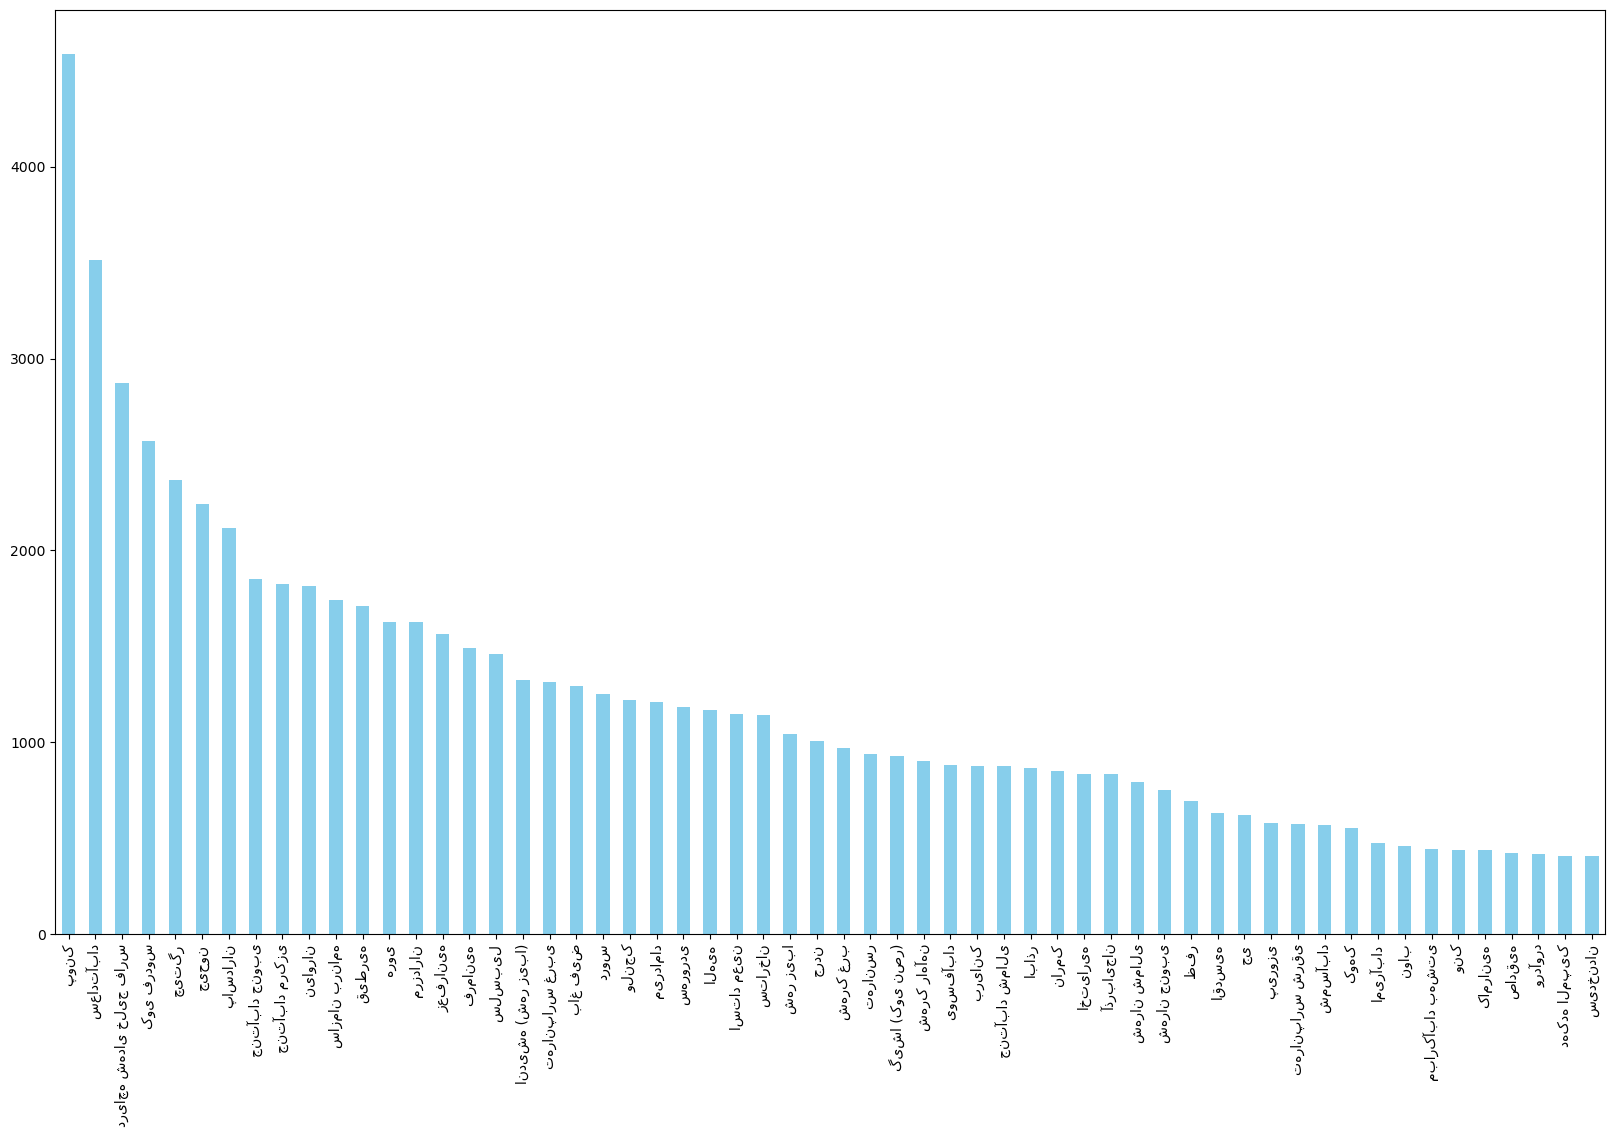

In [59]:
plt.figure(figsize=(20,12))
data[category_column].value_counts().plot(kind='bar', color='skyblue')

In [60]:
treshold = 2000
category_counts = data2[category_column].value_counts()
selected_categories = category_counts[category_counts > treshold].index
selected_categories_df = pd.DataFrame({'Address' : selected_categories,'count': category_counts[selected_categories]})
selected_categories_df

,Address,count
30.0,30.0,4481
49.0,49.0,3399
15.0,15.0,2708
20.0,20.0,2527
6.0,6.0,2161
9.0,9.0,2063
48.0,48.0,2043


In [61]:
y = data2['PriceUSD']
X = data2.drop('PriceUSD', axis=1)

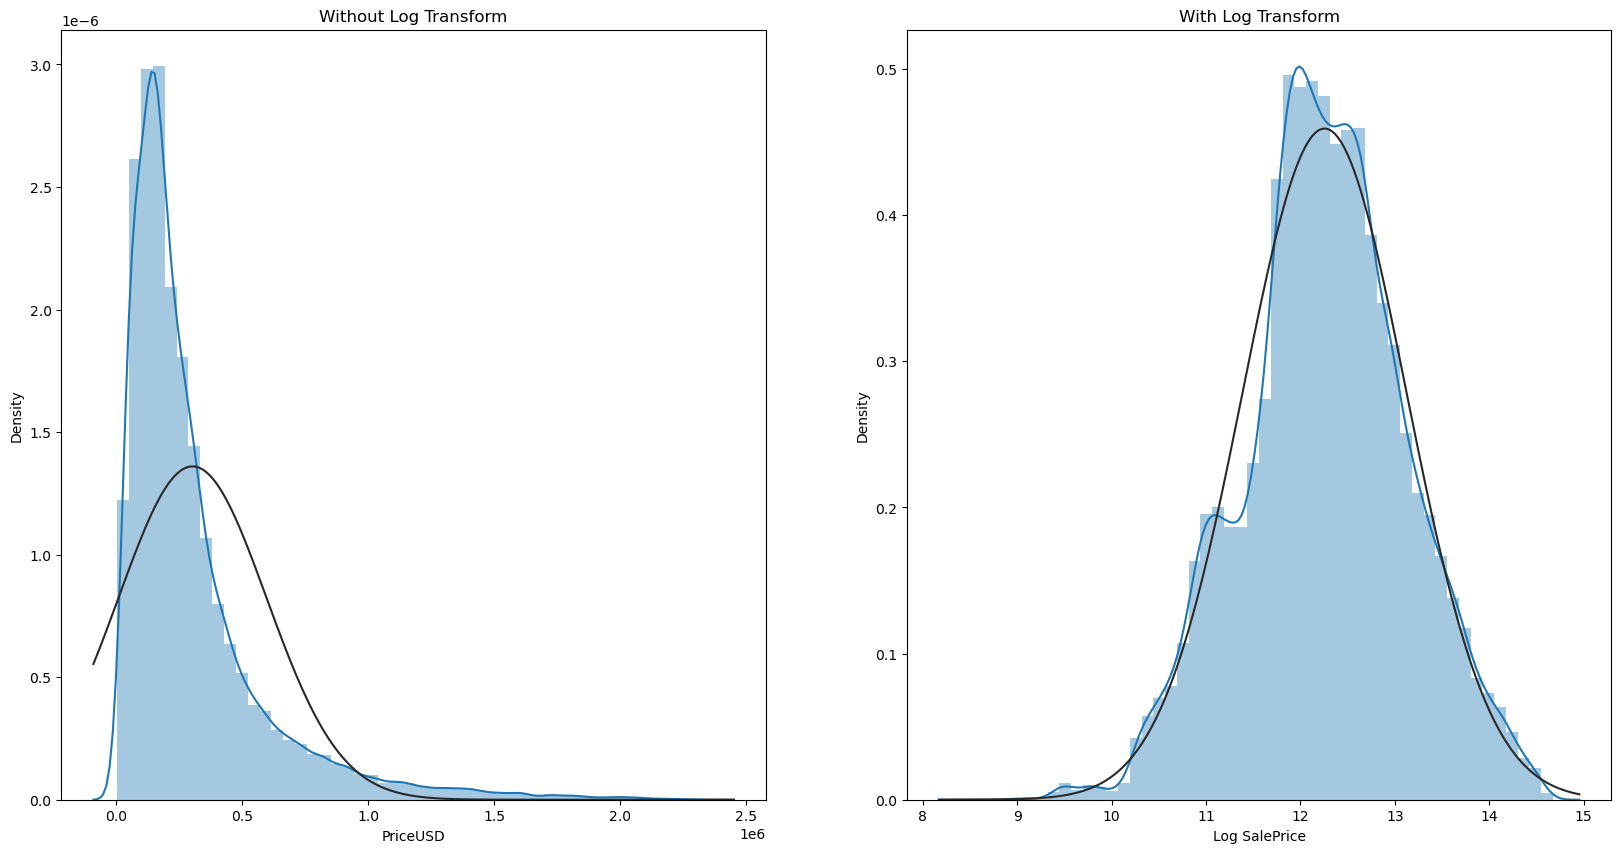

In [62]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.distplot(y, kde=True, fit=scipy.stats.norm)
plt.title("Without Log Transform")

plt.subplot(1, 2, 2)
sns.distplot(np.log(y), kde=True, fit=scipy.stats.norm)
plt.xlabel("Log SalePrice")
plt.title("With Log Transform")

plt.show()

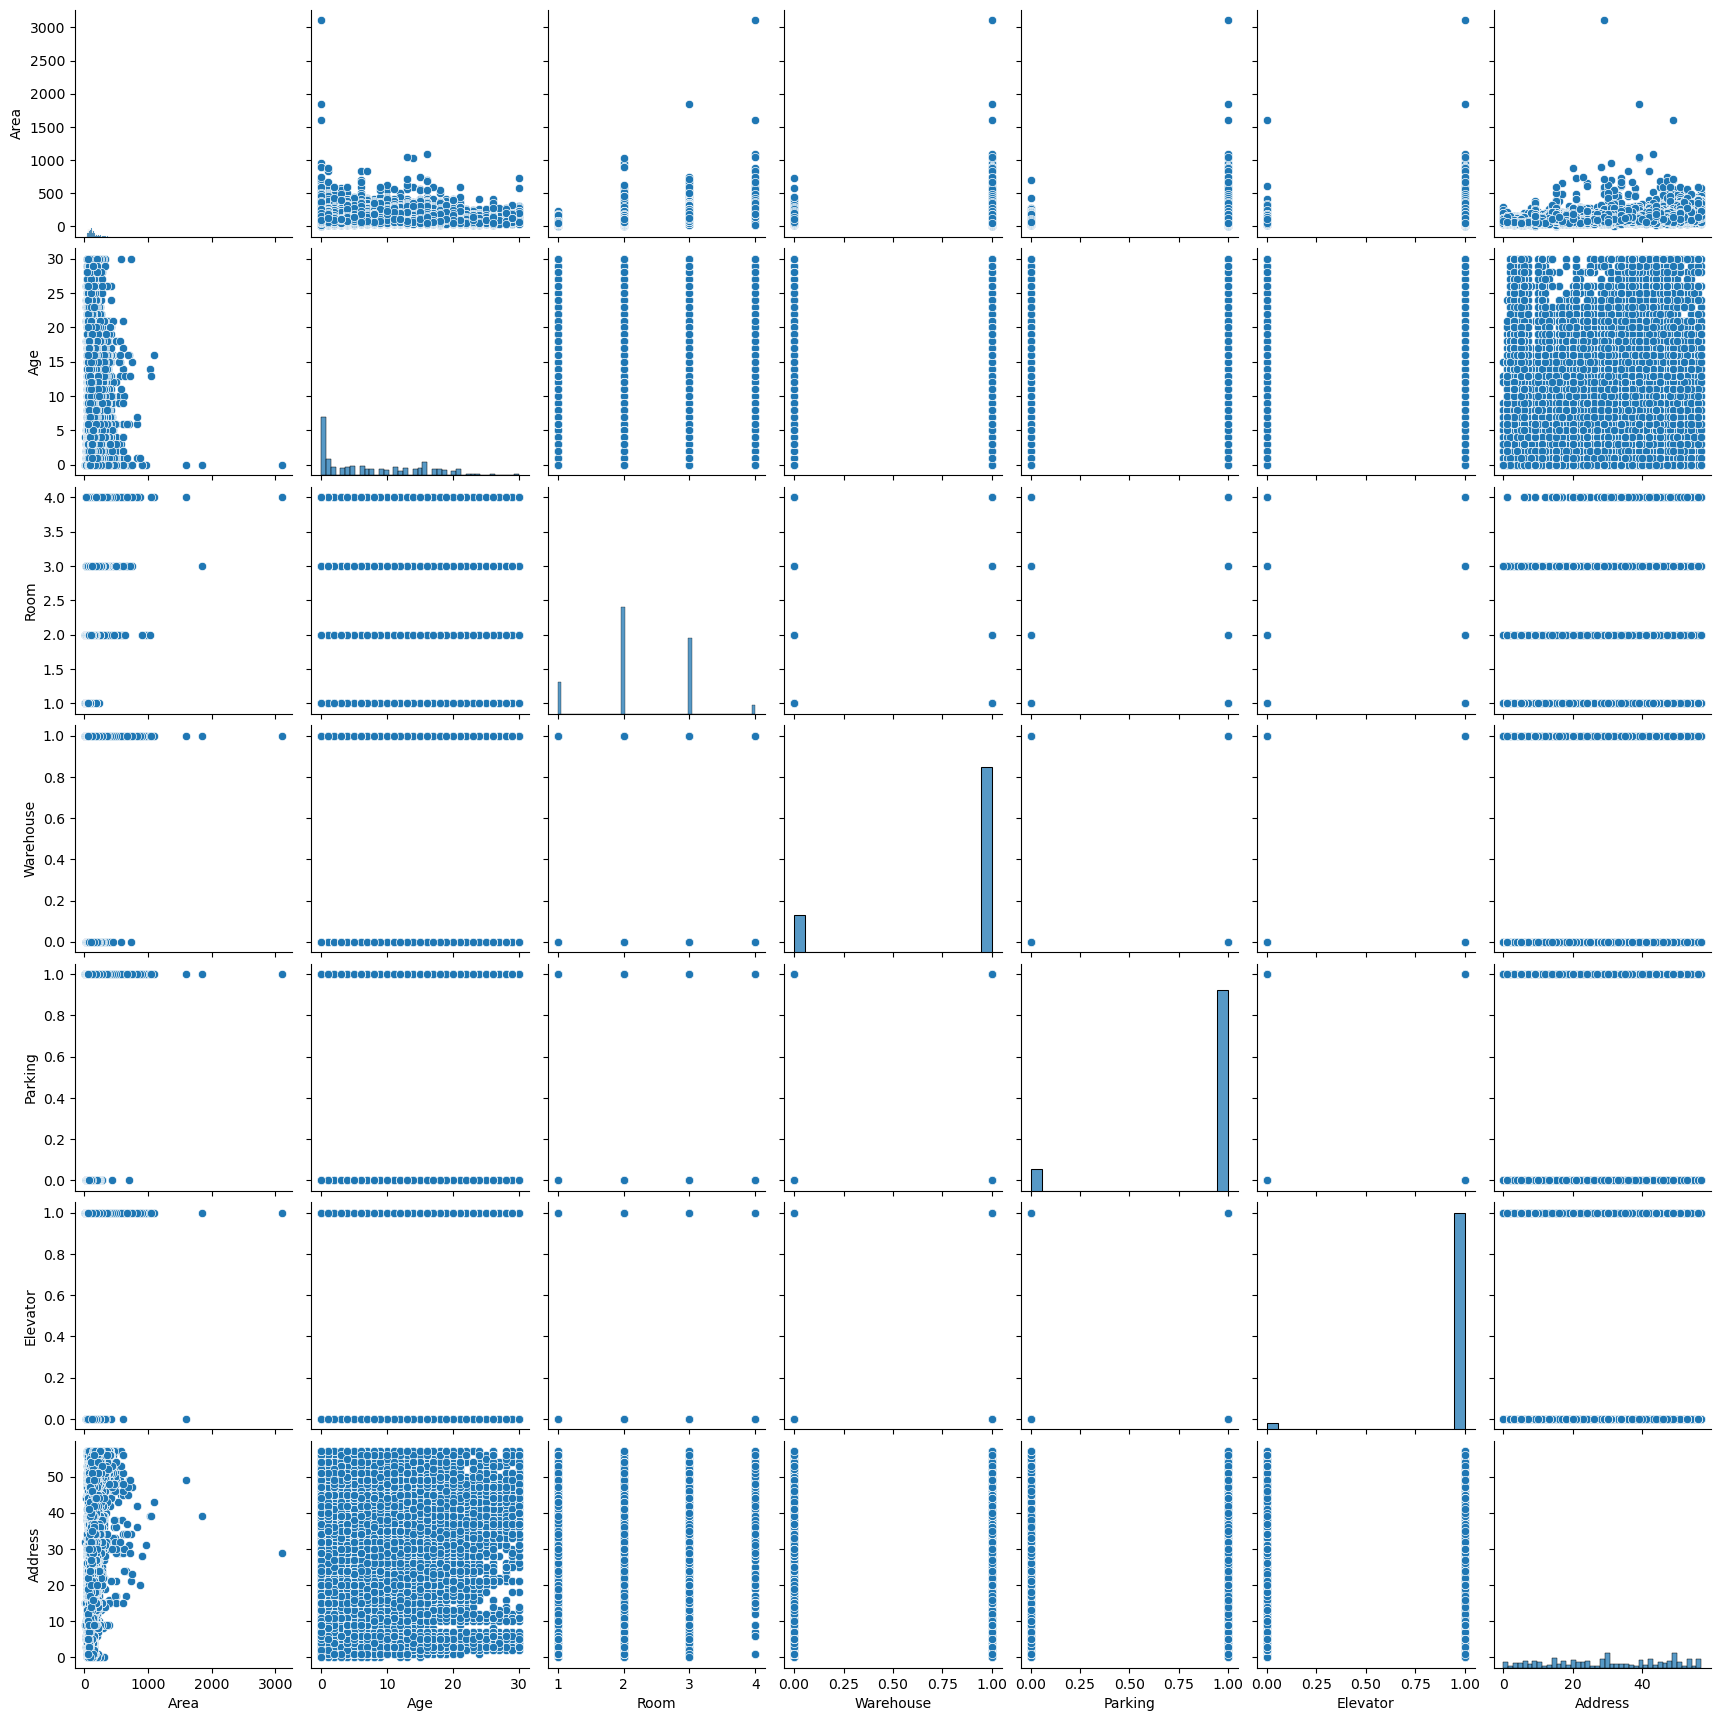

In [65]:
#Multicoliinearity
sns.pairplot(X);

In [81]:
data2.Address.value_counts()

30.0    4481
49.0    3399
15.0    2708
20.0    2527
6.0     2161
9.0     2063
48.0    2043
29.0    1821
24.0    1806
51.0    1754
23.0    1715
45.0    1676
39.0    1577
42.0    1573
57.0    1548
53.0    1453
5.0     1428
1.0     1277
31.0    1276
18.0    1272
50.0    1220
54.0    1189
43.0    1165
56.0    1146
34.0    1143
21.0    1126
11.0    1073
16.0    1029
44.0     983
47.0     940
40.0     912
13.0     898
32.0     888
37.0     868
17.0     863
3.0      857
35.0     835
7.0      822
28.0     820
41.0     805
22.0     777
19.0     734
38.0     673
52.0     610
4.0      599
10.0     567
12.0     566
27.0     546
26.0     542
36.0     461
2.0      451
55.0     436
46.0     427
0.0      423
8.0      407
25.0     405
33.0     394
14.0     389
Name: Address, dtype: int64

In [82]:
X

,Area,Age,Room,Warehouse,Parking,Elevator,Address
2,193,30,3,0,0,1,53.0
3,62,0,1,1,1,1,14.0
5,138,0,3,1,1,1,47.0
6,295,0,4,1,1,1,49.0
7,155,6,3,1,1,1,49.0
...,...,...,...,...,...,...,...
93109,147,16,3,1,1,1,49.0
93110,62,6,1,1,1,1,1.0
93112,181,8,3,1,1,1,44.0
93113,121,1,3,1,1,1,35.0


In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


# Select features (X) and target variable (y)
features = ['Area', 'Age', 'Room', 'Warehouse', 'Parking', 'Elevator','Address']
X = data2[features]
y = data2['PriceUSD']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)


Mean Squared Error: 16855999482.91824
Coefficients: [204181.19313898 -37099.60882878 -16108.09901566 -21733.77993254
 -15259.67025334   -513.20730511 101539.31117978]
Intercept: 302870.35266334773


In [101]:
import numpy as np

# Define the sample data
sample = {'Area': [100], 'Age': [0], 'Room': [2], 'Warehouse': [1], 'Parking': [1], 'Elevator': [1],'Address':[54]}

# Convert the sample data to a DataFrame
sample_df = pd.DataFrame(sample)

# Standardize the sample data using the same scaler used for training
sample_scaled = scaler.transform(sample_df)

# Make the price prediction
predicted_price = model.predict(sample_scaled)

# Print the predicted price
print('Predicted Price USD:', predicted_price[0])


Predicted Price USD: 413854.92227666796


In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your data is in a CSV file named 'your_data.csv'
# Load the data into a pandas DataFrame

# Select features (X) and target variable (y)
features = ['Area', 'Age', 'Room', 'Warehouse', 'Parking', 'Elevator', 'Address']
X = data2[features]
y = data2['PriceUSD']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a dictionary to store results
results = {}

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
results['Linear Regression'] = {'MSE': mse_linear, 'R2': r2_linear}

# Decision Tree
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
results['Decision Tree'] = {'MSE': mse_tree, 'R2': r2_tree}

# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
results['Random Forest'] = {'MSE': mse_rf, 'R2': r2_rf}

# Support Vector Regressor
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
results['SVR'] = {'MSE': mse_svr, 'R2': r2_svr}

# Print results
for model, metrics in results.items():
    print(f"{model}:\n  MSE: {metrics['MSE']}\n  R2: {metrics['R2']}\n")


Linear Regression:
  MSE: 16855999482.918238
  R2: 0.8037986136327274

Decision Tree:
  MSE: 9773814825.267088
  R2: 0.8862342146629913

Random Forest:
  MSE: 7145429314.260868
  R2: 0.9168282403503837

SVR:
  MSE: 91688399699.00919
  R2: -0.06723965867301773



In [89]:
data2

,Area,Age,Room,Warehouse,Parking,Elevator,Address,PriceUSD
2,193,30,3,0,0,1,53.0,468098
3,62,0,1,1,1,1,14.0,28696
5,138,0,3,1,1,1,47.0,417217
6,295,0,4,1,1,1,49.0,1221125
7,155,6,3,1,1,1,49.0,518978
...,...,...,...,...,...,...,...,...
93109,147,16,3,1,1,1,49.0,435662
93110,62,6,1,1,1,1,1.0,52374
93112,181,8,3,1,1,1,44.0,428520
93113,121,1,3,1,1,1,35.0,328532


In [90]:
#Compare_Models

In [91]:
from pycaret.regression import setup, compare_models
from pycaret.regression import *

In [92]:
s = setup(data2, target='PriceUSD')

,Description,Value
0,Session id,7652
1,Target,PriceUSD
2,Target type,Regression
3,Original data shape,"(68547, 8)"
4,Transformed data shape,"(68547, 8)"
5,Transformed train set shape,"(47982, 8)"
6,Transformed test set shape,"(20565, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


In [112]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,44384.3864,6720220971.7563,81927.1771,0.9225,0.2481,0.1837,0.3740
xgboost,Extreme Gradient Boosting,43799.8362,6820454131.3573,82545.0009,0.9214,0.2415,0.1765,0.3780
rf,Random Forest Regressor,44070.1556,7247145951.4495,85074.6262,0.9165,0.2374,0.1685,0.4480
gbr,Gradient Boosting Regressor,48355.5392,7415150958.5865,86062.2383,0.9146,0.2847,0.2195,0.2760
knn,K Neighbors Regressor,46834.5895,7885109144.6608,88749.6533,0.9092,0.2493,0.1801,0.2610
et,Extra Trees Regressor,45733.6635,7898771140.4675,88816.7359,0.9091,0.2450,0.1730,0.5700
dt,Decision Tree Regressor,51535.0000,10259755167.7085,101223.0111,0.8819,0.2690,0.1910,0.2550
ada,AdaBoost Regressor,79867.9547,14082973268.4660,118538.6775,0.8379,0.4992,0.5232,0.2600
br,Bayesian Ridge,83234.4003,19599493693.1974,138699.6741,0.7745,0.7143,0.5171,0.2660
llar,Lasso Least Angle Regression,83191.3678,19596509239.8837,138705.9770,0.7745,0.7133,0.5166,0.2490


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [113]:
print(best)

LGBMRegressor(random_state=7652)


In [114]:
finalize_model(best)

Pipeline(memory=FastMemory(location=C:\Users\Ghazaal\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Area', 'Age', 'Room', 'Warehouse',
                                             'Parking', 'Elevator', 'Address'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('actual_estimator', LGBMRegressor(random_state=7652))])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

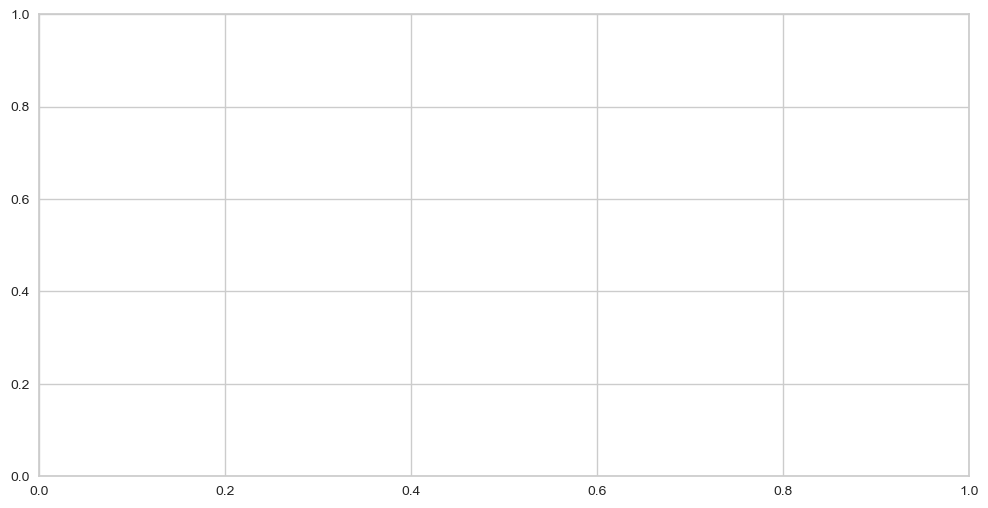

In [115]:
evaluate_model(best)

In [116]:
predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,44383.2051,6943317145.1997,83326.5693,0.9174,0.2497,0.1856


,Area,Age,Room,Warehouse,Parking,Elevator,Address,PriceUSD,prediction_label
12317,50,7,1,1,0,1,6.0,58129,6.140599e+04
28878,86,6,2,1,1,1,6.0,99047,9.573421e+04
74117,100,6,2,1,1,1,30.0,256132,2.067879e+05
44302,53,18,1,0,0,1,13.0,73465,6.782326e+04
33493,75,17,2,1,1,1,24.0,128284,1.409487e+05
...,...,...,...,...,...,...,...,...,...
58064,225,18,3,1,1,1,55.0,692249,6.627398e+05
12311,80,2,2,1,1,1,42.0,192427,2.223971e+05
26065,77,16,2,0,1,1,30.0,153692,1.339656e+05
69497,240,2,3,1,1,1,54.0,1052218,1.149258e+06


In [118]:
import numpy as np

# Define the sample data
sample1 = {'Area': [100], 'Age': [0], 'Room': [2], 'Warehouse': [1], 'Parking': [1], 'Elevator': [1] , 'Address':[54]}

# Convert the sample data to a DataFrame
sample_df1 = pd.DataFrame(sample1)


# Make the price prediction
predicted_price = best.predict(sample_df1)

# Print the predicted price
print('Predicted Price USD:', predicted_price[0])


Predicted Price USD: 383752.00197509374
